<a href="https://colab.research.google.com/github/JoedSilva18/atividade4-cn/blob/main/Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 4 - Calculo numérico**

(1) Considere a seguir três sistemas lineares de dimensão 6 do tipo Ax = b, sendo o vetor
b = (1, 1, 1, 1, 1, 1)t , com matriz A = (aij )i,j=1,...,6 dada como segue em cada caso:


**Função para verificar o critério das linhas**

In [ ]:
import math

def criterioLinhas(A):
  print('Verificando criterio das linhas: \n')

  coeficientes = []
  for i in range(len(A)):
    somaCoef = 0
    for j in range(len(A)):
      if i != j:
        # Somando todos os coeficientes
        somaCoef += math.fabs(A[i][j])
    # Dividimos pelo valor presente na diagonal principal
    somaCoef /= math.fabs(A[i][i])

    # Adiciona o valor na lista de coeficientes
    coeficientes.append(somaCoef)
  print('Lista de coeficintes: ', coeficientes)
  print()

  # Busca o maior coeficiente
  maiorCoef = max(coeficientes)
  print('O maior coeficiente é:', maiorCoef)

  if maiorCoef < 1:
    print('Para o metodo de Gauss-Jacobi, converge atraves do criterio das linhas')
  else:
    print('Para o metodo de Gauss-Jacobi, não converge atraves do criterio das linhas')

**Função para verificar o critério Sassenfield**

In [ ]:
import math

def criterioSassenfield(A):
  print('Verificando criterio de Sassenfield: \n')

  coeficientes = []
  for i in range(len(A)):
    b = 0
    for j in range(len(A)):
      if(i != j and i == 0) or i < j:
        b += A[i][j]
      elif i != j and i != 0:
        b += A[i][j]*coeficientes[j]

    b /= A[i][i]
    coeficientes.append(b)

  print('Lista de coeficintes: ', coeficientes)
  print()

  maiorCoeficiente = max(coeficientes)
  print('O maior coeficiente é:', maiorCoeficiente)

  if maiorCoeficiente < 1:
    print('Para o metodo de Gauss-Seidel, converge atraves do criterio de Sassenfield')
  else:
    print('Para o metodo de Gauss-Seidel, não converge atraves do criterio de Sassenfield')

**Função para calcular as distâncias relativas**

In [ ]:
# Funcao para calcular as distancias relativas
def distancias_relativas(lista_atual, lista_erro, erro_distancia_relativa):
    maior_atual = max(lista_atual)
    maior_erro = max(lista_erro)

    distancia = maior_erro / maior_atual
    print('Distância relativa: ', distancia)

    return distancia >= erro_distancia_relativa

**Função para calcular o resíduo r**

In [ ]:
# Funcao para calcular o residuo r
def residuo(lista_atual, erro):
  multi = A.dot(lista_atual)
  result = np.subtract(b, multi)

  lista = result[0]
  print('Vetor residuo: ', lista)
  result_abs = abs(lista)

  maior_valor = max(result_abs)

  return maior_valor >= erro

**Exercício 1.1**

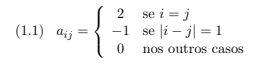

In [ ]:
import numpy as np

# Matriz original
A = np.array([[2,-1,0, 0, 0, 0] ,[-1, 2,-1,0, 0, 0], [0,-1 ,2,-1,0, 0], [0,0,-1,2,-1,0], [0,0,0,-1,2,-1] , [0,0,0,0,-1, 2]])

# vetor b com o Resultado
b = np.array([[1] ,[1], [1], [1], [1], [1]])

# Verificando se existe convergencia ou nao
criterioLinhas(A)
print('------------------------------------------------------------------------------------------------------\n')
criterioSassenfield(A)

Verificando criterio das linhas: 

Lista de coeficintes:  [0.5, 1.0, 1.0, 1.0, 1.0, 0.5]

O maior coeficiente é: 1.0
Para o metodo de Gauss-Jacobi, não converge atraves do criterio das linhas
------------------------------------------------------------------------------------------------------

Verificando criterio de Sassenfield: 

Lista de coeficintes:  [-0.5, -0.25, -0.375, -0.3125, -0.34375, 0.171875]

O maior coeficiente é: 0.171875
Para o metodo de Gauss-Seidel, converge atraves do criterio de Sassenfield


Como visto acima, o sistema converge para Gauss-Seidel. Portanto iremos aplicar o metodo iterativo de **Gauss Seidel**

**Gauss Seidel**

In [ ]:

# sistema linear
f1 = lambda x1,x2,x3,x4,x5,x6: (1 + x2)/2
f2 = lambda x1,x2,x3,x4,x5,x6: (1 + x1 + x3)/2
f3 = lambda x1,x2,x3,x4,x5,x6: (1 + x2 + x4)/2
f4 = lambda x1,x2,x3,x4,x5,x6: (1 + x3 + x5)/2
f5 = lambda x1,x2,x3,x4,x5,x6: (1 + x4 + x6)/2
f6 = lambda x1,x2,x3,x4,x5,x6: (1 + x5)/2

# Chute inicial
x1_0 = 5
x2_0 = 5
x3_0 = 5
x4_0 = 5
x5_0 = 5
x6_0 = 5

count = 1

# erro maximo
erro_distancia_relativa = 0.1
erro_residuo = 0.01

# iteracao de Gauss Seidel
print('Chute inicial: x1: {0}, x2: {1}, x3: {2}, x4: {3}, x5: {4}, x6: {5}'.format(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0))
print('\n--------------------------------------------------------------------------------------------------------------------------------------------\n')

condicao = True
distancia = 0

while condicao:
    print('Iteração ', count)
    x1_1 = f1(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x2_1 = f2(x1_1, x2_0, x3_0, x4_0, x5_0, x6_0)
    x3_1 = f3(x1_1, x2_1, x3_0, x4_0, x5_0, x6_0)
    x4_1 = f4(x1_1, x2_1, x3_1, x4_0, x5_0, x6_0)
    x5_1 = f5(x1_1, x2_1, x3_1, x4_1, x5_0, x6_0)
    x6_1 = f6(x1_1, x2_1, x3_1, x4_1, x5_1, x6_0)

    print('x({0}): [{1}, {2}, {3}, {4}, {5}, {6}]'.format(count, x1_1, x2_1, x3_1, x4_1, x5_1, x6_1))

    lista_atual = [x1_1, x2_1, x3_1, x4_1, x5_1, x6_1]

    e1 = abs(x1_0 - x1_1);
    e2 = abs(x2_0 - x2_1);
    e3 = abs(x3_0 - x3_1);
    e4 = abs(x4_0 - x4_1);
    e5 = abs(x5_0 - x5_1);
    e6 = abs(x6_0 - x6_1);

    lista_erro = [e1, e2, e3, e4, e5, e6]

    condicao_distancia_relativa = distancias_relativas(lista_atual, lista_erro, erro_distancia_relativa)
    condicao_residuo = residuo(lista_atual, erro_residuo)

    # Verifica condicoes de parada
    if (not condicao_distancia_relativa) and (not condicao_residuo):
      condicao = False

    count += 1
    x1_0 = x1_1
    x2_0 = x2_1
    x3_0 = x3_1
    x4_0 = x4_1
    x5_0 = x5_1
    x6_0 = x6_1
    
    print('\n--------------------------------------------------------------------------------------------------------------------------------------------\n')

print('Resultado final: ')
print('Total de iterações: ', count - 1)
print('x: [{1}, {2}, {3}, {4}, {5}, {6}]'.format(count, x1_1, x2_1, x3_1, x4_1, x5_1, x6_1))

Chute inicial: x1: 5, x2: 5, x3: 5, x4: 5, x5: 5, x6: 5

--------------------------------------------------------------------------------------------------------------------------------------------

Iteração  1
x(1): [3.0, 4.5, 5.25, 5.625, 5.8125, 3.40625]
Distância relativa:  0.34408602150537637
Vetor residuo:  [-0.5      0.25     0.625    0.8125  -1.59375  0.     ]

--------------------------------------------------------------------------------------------------------------------------------------------

Iteração  2
x(2): [2.75, 4.5, 5.5625, 6.1875, 5.296875, 3.1484375]
Distância relativa:  0.09090909090909091
Vetor residuo:  [ 0.         0.3125     0.5625    -0.515625  -0.2578125  0.       ]

--------------------------------------------------------------------------------------------------------------------------------------------

Iteração  3
x(3): [2.75, 4.65625, 5.921875, 6.109375, 5.12890625, 3.064453125]
Distância relativa:  0.058823529411764705
Vetor residuo:  [ 0.15625     

**Exercício 1.2**

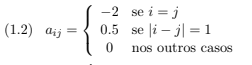

In [ ]:
import numpy as np

# Matriz original
A = np.array([[-2, 0.5, 0, 0, 0, 0], [0.5, -2, 0.5, 0, 0, 0], [0, 0.5 ,-2, 0.5, 0, 0], [0, 0, 0.5, -2, 0.5, 0], [0, 0, 0, 0.5, -2, 0.5] , [0, 0, 0, 0, 0.5, -2]])

# vetor b com o Resultado
b = np.array([[1] ,[1], [1], [1], [1], [1]])

# Verificando se existe convergencia ou nao
criterioLinhas(A)
print('------------------------------------------------------------------------------------------------------\n')
criterioSassenfield(A)

Verificando criterio das linhas: 

Lista de coeficintes:  [0.25, 0.5, 0.5, 0.5, 0.5, 0.25]

O maior coeficiente é: 0.5
Para o metodo de Gauss-Jacobi, converge atraves do criterio das linhas
------------------------------------------------------------------------------------------------------

Verificando criterio de Sassenfield: 

Lista de coeficintes:  [-0.25, -0.1875, -0.203125, -0.19921875, -0.2001953125, 0.050048828125]

O maior coeficiente é: 0.050048828125
Para o metodo de Gauss-Seidel, converge atraves do criterio de Sassenfield


Fazendo a iteração através do método de Gauss Jacobi

**Gauss Jacobi**

In [ ]:
# Sistema linear
f1 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x2)) / (-2)
f2 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x1) - (0.5* x3)) / (-2)
f3 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x2) - (0.5* x4)) / (-2)
f4 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x3) - (0.5* x5)) / (-2)
f5 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x4) - (0.5* x6)) / (-2)
f6 = lambda x1,x2,x3,x4,x5,x6: (1 - (0.5 * x5)) / (-2)

# Setup inicial
x1_0 = 5
x2_0 = 5
x3_0 = 5
x4_0 = 5
x5_0 = 5
x6_0 = 5

count = 1

# Erro maximo
erro_distancia_relativa = 0.1
erro_residuo = 0.01

# iteracao de Gauss Jacobi
print('Chute inicial: x1: {0}, x2: {1}, x3: {2}, x4: {3}, x5: {4}, x6: {5}'.format(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0))
print('\n--------------------------------------------------------------------------------------------------------------------------------------------\n')

condicao = True
distancia = 0

while condicao:
    x1_1 = f1(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x2_1 = f2(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x3_1 = f3(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x4_1 = f4(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x5_1 = f5(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)
    x6_1 = f6(x1_0, x2_0, x3_0, x4_0, x5_0, x6_0)

    print('x({0}): [{1}, {2}, {3}, {4}, {5}, {6}]'.format(count, x1_1, x2_1, x3_1, x4_1, x5_1, x6_1))

    lista_atual = [x1_1, x2_1, x3_1, x4_1, x5_1, x6_1]

    e1 = abs(x1_0 - x1_1);
    e2 = abs(x2_0 - x2_1);
    e3 = abs(x3_0 - x3_1);
    e4 = abs(x4_0 - x4_1);
    e5 = abs(x5_0 - x5_1);
    e6 = abs(x6_0 - x6_1);
    
    condicao_distancia_relativa = distancias_relativas(lista_atual, lista_erro, erro_distancia_relativa)
    condicao_residuo = residuo(lista_atual, erro_residuo)

    # Verifica condicoes de parada
    if (not condicao_distancia_relativa) and (not condicao_residuo):
      condicao = False

    count += 1
    x1_0 = x1_1
    x2_0 = x2_1
    x3_0 = x3_1
    x4_0 = x4_1
    x5_0 = x5_1
    x6_0 = x6_1

    print('\n--------------------------------------------------------------------------------------------------------------------------------------------\n')

print('Resultado final: ')
print('Total de iterações: ', count - 1)
print('x: [{1}, {2}, {3}, {4}, {5}, {6}]'.format(count, x1_1, x2_1, x3_1, x4_1, x5_1, x6_1))

Chute inicial: x1: 5, x2: 5, x3: 5, x4: 5, x5: 5, x6: 5

--------------------------------------------------------------------------------------------------------------------------------------------

x(1): [0.75, 2.0, 2.0, 2.0, 2.0, 0.75]
Distância relativa:  0.002655029296875
Vetor residuo:  [1.5   3.625 3.    3.    3.625 1.5  ]

--------------------------------------------------------------------------------------------------------------------------------------------

x(2): [-0.0, 0.1875, 0.5, 0.5, 0.1875, -0.0]
Distância relativa:  0.0106201171875
Vetor residuo:  [0.90625 1.125   1.65625 1.65625 1.125   0.90625]

--------------------------------------------------------------------------------------------------------------------------------------------

x(3): [-0.453125, -0.375, -0.328125, -0.328125, -0.375, -0.453125]
Distância relativa:  -0.016183035714285716
Vetor residuo:  [0.28125   0.640625  0.6953125 0.6953125 0.640625  0.28125  ]

----------------------------------------------

**Exercício 1.3**

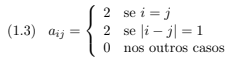

In [ ]:
import numpy as np

# Matriz original
A = np.array([[2, 2, 0, 0, 0, 0], [2, 2, 2, 0, 0, 0], [0, 2 ,2, 2, 0, 0], [0, 0, 2, 2, 2, 0], [0, 0, 0, 2, 2, 2] , [0, 0, 0, 0, 2, 2]])

# vetor b com o Resultado
b = np.array([[1] ,[1], [1], [1], [1], [1]])

# Verificando se existe convergencia ou nao
criterioLinhas(A)
print('------------------------------------------------------------------------------------------------------\n')
criterioSassenfield(A)

Verificando criterio das linhas: 

Lista de coeficintes:  [1.0, 2.0, 2.0, 2.0, 2.0, 1.0]

O maior coeficiente é: 2.0
Para o metodo de Gauss-Jacobi, não converge atraves do criterio das linhas
------------------------------------------------------------------------------------------------------

Verificando criterio de Sassenfield: 

Lista de coeficintes:  [1.0, 2.0, 3.0, 4.0, 5.0, 5.0]

O maior coeficiente é: 5.0
Para o metodo de Gauss-Seidel, não converge atraves do criterio de Sassenfield


Como visto acima, o sistema não converge para ambos os métodos.